In [3]:
# Imports we may need
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import ujson as json
import bz2
import pyarrow.parquet as pq
import matplotlib.ticker as plticker


from wikidata.client import Client
import wikipedia

import urllib.request
from textblob import TextBlob

client = Client()

In [4]:
#we create a list with the years corresponding to the QuoteBank dataset

years_list= ["2015", "2016", "2017", "2018" ,"2019", "2020"]

In [3]:
def filter_dataframe(word, year):
# This function will be used to filter the dataset selecting the quotes of a given year containing a given word
# in a free text search fashion.

    list_df = []
    with pd.read_json("data/quotes-"+year+".json.bz2", lines=True,  chunksize = 10000, compression = 'bz2') as df_reader:
        for chunk in df_reader: #we read chunk by chunk in order not to store everything in memory
            chunk_word = chunk[chunk['quotation'].str.contains(word)] #we create a dataframe containing the word
            list_df.append(chunk_word)  #we append it to the list of dataframes
    df_word = pd.concat(list_df) #we concatenate the dataframes together to obtain a unique one
    return df_word

In [4]:
def removing_not_inherent_quotes(list_of_words, df, aliases):
# This function removes the quotes containing one of the word in a list of words and whose speaker is one in the aliases list
    df_copy = df
    for word in list_of_words:
        df_copy = df_copy[~df_copy['quotation'].str.contains(word)] #we remove the quotes containing the word
    df_new = df_copy[~df_copy['speaker'].isin(aliases)] # We remove the quotes whose speaker is in the aliases list
    return df_new

### We select the quotes containing the word Trump

In [34]:
for year in years_list:
    one_df_Trump = filter_dataframe("Trump", year)
    one_df_Trump.to_csv('df_Trump'+year+'.csv', index=False) #We save the files as checkpoints (it takes a long time to execute)
    print('i finished one file')

KeyboardInterrupt: 

In [5]:
#We create a single dataframe concatenating the previously obtained dataframes

list_df_Trump = []
for year in years_list:
    one_df_Trump = pd.read_csv('df_Trump'+year+'.csv') #we read the file
    list_df_Trump.append(one_df_Trump) #we append the dataframe to the list of dataframes
df_Trump = pd.concat(list_df_Trump) #we concatenate them in a single one

In [6]:
df_Trump

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2015-06-18-018819,How long do you think it'll take for Donald Tr...,Chris Matthews,"['Q15735939', 'Q25189328', 'Q5107375', 'Q51108...",2015-06-18 10:00:00,1,"[['Chris Matthews', '0.3869'], ['None', '0.319...",['http://talkingpointsmemo.com/dc/donald-trump...,E
1,2015-09-16-006359,And I'm just pointing out the absurd on both s...,Kathleen Madigan,['Q6376814'],2015-09-16 05:44:37,1,"[['Kathleen Madigan', '0.8025'], ['None', '0.1...",['http://northjersey.com/arts-and-entertainmen...,E
2,2015-05-11-003168,"And you had Michael Jackson roller skating, an...",Jim McMahon,"['Q1689159', 'Q17306267', 'Q6196886']",2015-05-11 02:03:27,1,"[['Jim McMahon', '0.8731'], ['None', '0.1232']...",['http://www.seattletimes.com/seattle-news/bel...,E
3,2015-10-20-044420,I like that he's not spinning things. He seems...,None,[],2015-10-20 23:46:58,1,"[['None', '0.7832'], ['Ben Carson', '0.0755'],...",['http://detroitnews.com/story/news/politics/2...,E
4,2015-12-22-031341,"I promise, I won't talk about Trump again,",Jeb Bush,['Q221997'],2015-12-22 20:43:59,10,"[['Jeb Bush', '0.7816'], ['None', '0.1677'], [...",['http://www.politico.com/story/2015/12/jeb-bu...,E
...,...,...,...,...,...,...,...,...,...
52263,2020-02-05-103219,Trump offends and disrespects the Venezuelan p...,Jorge Arreaza,['Q6623799'],2020-02-05 00:00:00,11,"[['Jorge Arreaza', '0.9164'], ['None', '0.0726...",['https://www.rawstory.com/2020/02/imwithfred-...,E
52264,2020-02-05-103235,"Trump survived, but he is the most unpopular p...",None,[],2020-02-05 23:11:42,3,"[['None', '0.8786'], ['Donald Trump', '0.1214']]",['https://www.wellsvilledaily.com/zz/news/2020...,E
52265,2020-03-13-071475,"Trump tried to mitigate the issue, saying it i...",Hassan Nasrallah,['Q181182'],2020-03-13 22:15:06,1,"[['Hassan Nasrallah', '0.922'], ['None', '0.07...",['http://israelnationalnews.com/News/News.aspx...,E
52266,2020-03-15-037086,Trump's do-over approach -- he unlocked $50 bi...,Newt Gingrich,['Q182788'],2020-03-15 00:00:00,40,"[['Newt Gingrich', '0.5146'], ['None', '0.3958...",['http://uspolitics.einnews.com/article/512089...,E


In [13]:
# we save it (checkpoint)
df_Trump.to_csv('df_Trump.csv', index=False)

In [55]:
df_Trump = pd.read_csv('df_Trump.csv')

In [52]:
#We load the parquet file already preprocessed

parquet_frame = pd.read_parquet("data/speaker_attributes_updated.parquet")

QID_columns = ["nationality", "gender", "ethnic_group", "occupation", "party", "candidacy", "religion"]

In [53]:
parquet_frame #we have a look at it

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,"[Washington, President Washington, G. Washingt...",[+1732-02-22T00:00:00Z],"[Great Britain, United States of America]",[male],1395141751,None,W000178,"[politician, military officer, farmer, cartogr...",[independent politician],None,Q23,George Washington,"[1792 United States presidential election, 178...",item,[Episcopal Church]
1,"[Douglas Noel Adams, Douglas Noël Adams, Dougl...",[+1952-03-11T00:00:00Z],[United Kingdom],[male],1395737157,[White British],None,"[playwright, screenwriter, novelist, children'...",None,None,Q42,Douglas Adams,None,item,None
2,"[Paul Marie Ghislain Otlet, Paul Marie Otlet]",[+1868-08-23T00:00:00Z],[Belgium],[male],1380367296,None,None,"[writer, lawyer, librarian, information scient...",None,None,Q1868,Paul Otlet,None,item,None
3,"[George Walker Bush, Bush Jr., Dubya, GWB, Bus...",[+1946-07-06T00:00:00Z],[United States of America],[male],1395142029,None,None,"[politician, motivational speaker, autobiograp...",[Republican Party],None,Q207,George W. Bush,"[2000 United States presidential election, 200...",item,"[United Methodist Church, Episcopal Church, Me..."
4,"[Velázquez, Diego Rodríguez de Silva y Velázqu...",[+1599-06-06T00:00:00Z],[Spain],[male],1391704596,None,None,[painter],None,None,Q297,Diego Velázquez,None,item,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9055976,[Barker Howard],None,[United States of America],[male],1397399351,None,None,[politician],None,None,Q106406560,Barker B. Howard,None,item,None
9055977,[Charles Macomber],None,[United States of America],[male],1397399471,None,None,[politician],None,None,Q106406571,Charles H. Macomber,None,item,None
9055978,None,[+1848-04-01T00:00:00Z],None,[female],1397399751,None,None,None,None,None,Q106406588,Dina David,None,item,None
9055979,None,[+1899-03-18T00:00:00Z],None,[female],1397399799,None,None,None,None,None,Q106406593,Irma Dexinger,None,item,None


### Refining of the dataframe

In [57]:
n_rows_before_cleaning = df_Trump.shape[0] 

In [58]:
# We look for the aliases of Trump
count = 0
for el in parquet_frame['aliases']:
    count=count+1
    if type(el) == np.ndarray:
        if ('Trump' in el):
            Trump_aliases = el
            print(Trump_aliases)

['Donald John Trump' 'Donald J. Trump' 'Trump' 'The Donald' 'POTUS 45'
 'Donald J Trump' 'President Donald Trump' 'President Trump'
 'President Donald J. Trump' 'President Donald John Trump' 'DJT'
 'Mr Trump' 'President Donald J Trump' 'John Barron' 'John Miller'
 'David Dennison']


In [59]:
Trump_aliases = Trump_aliases.tolist()
Trump_aliases.append('Donald Trump') # we add Donald Trump to the aliases since it is not present in the list

# we will clean the dataframe removing all the quotes referring to the family of Trump and not to Trump himself
Trump_family = ['Frederick Trump', 'Elizabeth Christ Trump', 'John George Trump',
                                        'Fred Trump', 'Maryanne Trump Barry', 'Mary Trump', 'Ivana Trump', 
                                        'Melania Trump', 'Donald Trump, Jr.', 'Ivanka Trump',
                                        'Eric Trump', 'Tiffany Trump', 'Barron Trump', 'Chrystelle Trump Bond',
                                        'David H. Trump', 'Judd Trump', 'Kelly Trump', 'Peter Trump']
df_Trump = removing_not_inherent_quotes(Trump_family, df_Trump, Trump_aliases)

In [60]:
df_Trump #we have a look at the dataframe after the cleaning

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2015-06-18-018819,How long do you think it'll take for Donald Tr...,Chris Matthews,"['Q15735939', 'Q25189328', 'Q5107375', 'Q51108...",2015-06-18 10:00:00,1,"[['Chris Matthews', '0.3869'], ['None', '0.319...",['http://talkingpointsmemo.com/dc/donald-trump...,E
1,2015-09-16-006359,And I'm just pointing out the absurd on both s...,Kathleen Madigan,['Q6376814'],2015-09-16 05:44:37,1,"[['Kathleen Madigan', '0.8025'], ['None', '0.1...",['http://northjersey.com/arts-and-entertainmen...,E
2,2015-05-11-003168,"And you had Michael Jackson roller skating, an...",Jim McMahon,"['Q1689159', 'Q17306267', 'Q6196886']",2015-05-11 02:03:27,1,"[['Jim McMahon', '0.8731'], ['None', '0.1232']...",['http://www.seattletimes.com/seattle-news/bel...,E
3,2015-10-20-044420,I like that he's not spinning things. He seems...,None,[],2015-10-20 23:46:58,1,"[['None', '0.7832'], ['Ben Carson', '0.0755'],...",['http://detroitnews.com/story/news/politics/2...,E
4,2015-12-22-031341,"I promise, I won't talk about Trump again,",Jeb Bush,['Q221997'],2015-12-22 20:43:59,10,"[['Jeb Bush', '0.7816'], ['None', '0.1677'], [...",['http://www.politico.com/story/2015/12/jeb-bu...,E
...,...,...,...,...,...,...,...,...,...
935288,2020-02-05-103219,Trump offends and disrespects the Venezuelan p...,Jorge Arreaza,['Q6623799'],2020-02-05 00:00:00,11,"[['Jorge Arreaza', '0.9164'], ['None', '0.0726...",['https://www.rawstory.com/2020/02/imwithfred-...,E
935289,2020-02-05-103235,"Trump survived, but he is the most unpopular p...",None,[],2020-02-05 23:11:42,3,"[['None', '0.8786'], ['Donald Trump', '0.1214']]",['https://www.wellsvilledaily.com/zz/news/2020...,E
935290,2020-03-13-071475,"Trump tried to mitigate the issue, saying it i...",Hassan Nasrallah,['Q181182'],2020-03-13 22:15:06,1,"[['Hassan Nasrallah', '0.922'], ['None', '0.07...",['http://israelnationalnews.com/News/News.aspx...,E
935291,2020-03-15-037086,Trump's do-over approach -- he unlocked $50 bi...,Newt Gingrich,['Q182788'],2020-03-15 00:00:00,40,"[['Newt Gingrich', '0.5146'], ['None', '0.3958...",['http://uspolitics.einnews.com/article/512089...,E


In [64]:
n_rows_after_cleaning = df_Trump.shape[0]

In [93]:
def cleaning_results(n_rows_before, n_rows_after, person):
    # we create a new dataframe for the sake of visualization
    dic = {'before' : [n_rows_before], 'after' : [n_rows_after]}
    df_visual = pd.DataFrame.from_dict(dic)
    #print(df_visual)
    plt.rcParams["figure.figsize"] = (8,6)
    df_visual.mean().plot(kind='bar')
    plt.ylabel('number of quotes')
    plt.title('number of rows before and after cleaning for '+person)
    plt.show()

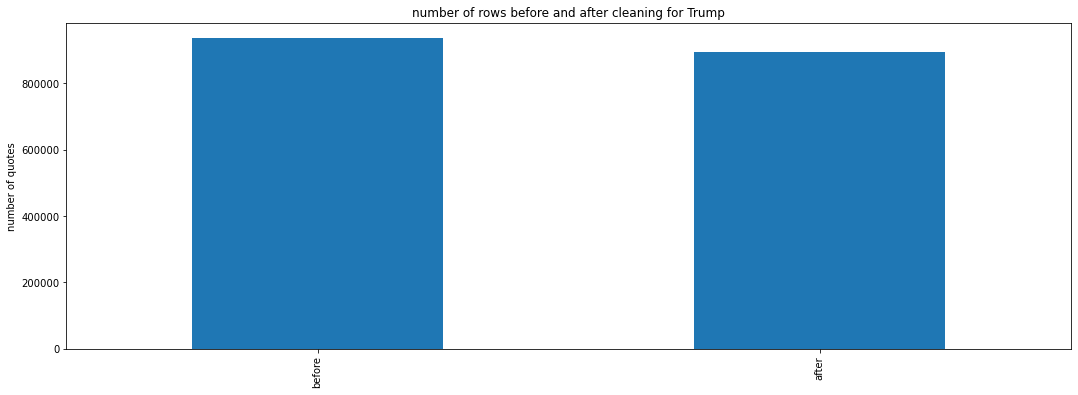

In [66]:
cleaning_results(n_rows_before_cleaning, n_rows_after_cleaning, 'Trump')

As we can see from the plot there are a few sentences that we cleaned, the majority of them was already about Donald Trump (not about his family) and not said by Trump himself.

In [67]:
# we save it (checkpoint)
df_Trump.to_csv('df_Trump_cleaned.csv', index=False)

### Our initial idea (discarded for infeasibility)

Our initial idea was to study the sentimental analysis of the quotes referred to a given poitician in order to see if the speaker was speaking about him in a positive or negative way, to do that we applied a sentimental analysis to each quote of the refined dataframe

In [44]:
# for each row of the dataset we apply a sentimental analysis tool to understand if the author is speaking with a positive or negative
# tone with respect to Donald Trump

df_Trump['sentiment'] = df_Trump['quotation'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

In [45]:
df_Trump

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,sentiment
0,2015-06-18-018819,How long do you think it'll take for Donald Tr...,Chris Matthews,"['Q15735939', 'Q25189328', 'Q5107375', 'Q51108...",2015-06-18 10:00:00,1,"[['Chris Matthews', '0.3869'], ['None', '0.319...",['http://talkingpointsmemo.com/dc/donald-trump...,E,-0.050000
1,2015-09-16-006359,And I'm just pointing out the absurd on both s...,Kathleen Madigan,['Q6376814'],2015-09-16 05:44:37,1,"[['Kathleen Madigan', '0.8025'], ['None', '0.1...",['http://northjersey.com/arts-and-entertainmen...,E,-0.048214
2,2015-05-11-003168,"And you had Michael Jackson roller skating, an...",Jim McMahon,"['Q1689159', 'Q17306267', 'Q6196886']",2015-05-11 02:03:27,1,"[['Jim McMahon', '0.8731'], ['None', '0.1232']...",['http://www.seattletimes.com/seattle-news/bel...,E,0.000000
3,2015-10-20-044420,I like that he's not spinning things. He seems...,None,[],2015-10-20 23:46:58,1,"[['None', '0.7832'], ['Ben Carson', '0.0755'],...",['http://detroitnews.com/story/news/politics/2...,E,0.450000
4,2015-12-22-031341,"I promise, I won't talk about Trump again,",Jeb Bush,['Q221997'],2015-12-22 20:43:59,10,"[['Jeb Bush', '0.7816'], ['None', '0.1677'], [...",['http://www.politico.com/story/2015/12/jeb-bu...,E,0.000000
...,...,...,...,...,...,...,...,...,...,...
52263,2020-02-05-103219,Trump offends and disrespects the Venezuelan p...,Jorge Arreaza,['Q6623799'],2020-02-05 00:00:00,11,"[['Jorge Arreaza', '0.9164'], ['None', '0.0726...",['https://www.rawstory.com/2020/02/imwithfred-...,E,-0.800000
52264,2020-02-05-103235,"Trump survived, but he is the most unpopular p...",None,[],2020-02-05 23:11:42,3,"[['None', '0.8786'], ['Donald Trump', '0.1214']]",['https://www.wellsvilledaily.com/zz/news/2020...,E,0.350000
52265,2020-03-13-071475,"Trump tried to mitigate the issue, saying it i...",Hassan Nasrallah,['Q181182'],2020-03-13 22:15:06,1,"[['Hassan Nasrallah', '0.922'], ['None', '0.07...",['http://israelnationalnews.com/News/News.aspx...,E,-0.083333
52266,2020-03-15-037086,Trump's do-over approach -- he unlocked $50 bi...,Newt Gingrich,['Q182788'],2020-03-15 00:00:00,40,"[['Newt Gingrich', '0.5146'], ['None', '0.3958...",['http://uspolitics.einnews.com/article/512089...,E,0.066667


In [46]:
df_Trump.to_csv('df_Trump_with_sentiments.csv', index = False) #checkpoint

In [69]:
df_Trump = pd.read_csv('df_Trump_with_sentiments.csv')

In [70]:
df_Trump.head(10)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,sentiment
0,2015-06-18-018819,How long do you think it'll take for Donald Tr...,Chris Matthews,"['Q15735939', 'Q25189328', 'Q5107375', 'Q51108...",2015-06-18 10:00:00,1,"[['Chris Matthews', '0.3869'], ['None', '0.319...",['http://talkingpointsmemo.com/dc/donald-trump...,E,-0.050000
1,2015-09-16-006359,And I'm just pointing out the absurd on both s...,Kathleen Madigan,['Q6376814'],2015-09-16 05:44:37,1,"[['Kathleen Madigan', '0.8025'], ['None', '0.1...",['http://northjersey.com/arts-and-entertainmen...,E,-0.048214
2,2015-05-11-003168,"And you had Michael Jackson roller skating, an...",Jim McMahon,"['Q1689159', 'Q17306267', 'Q6196886']",2015-05-11 02:03:27,1,"[['Jim McMahon', '0.8731'], ['None', '0.1232']...",['http://www.seattletimes.com/seattle-news/bel...,E,0.000000
3,2015-10-20-044420,I like that he's not spinning things. He seems...,None,[],2015-10-20 23:46:58,1,"[['None', '0.7832'], ['Ben Carson', '0.0755'],...",['http://detroitnews.com/story/news/politics/2...,E,0.450000
4,2015-12-22-031341,"I promise, I won't talk about Trump again,",Jeb Bush,['Q221997'],2015-12-22 20:43:59,10,"[['Jeb Bush', '0.7816'], ['None', '0.1677'], [...",['http://www.politico.com/story/2015/12/jeb-bu...,E,0.000000
5,2015-05-20-027996,"If I recall correctly, tickets for newly-elect...",None,[],2015-05-20 03:11:06,1,"[['None', '0.9528'], ['Donald Trump', '0.0472']]",['http://chicago.suntimes.com/news/7/71/609234...,E,0.392857
6,2015-07-21-047379,I'm sure the Republicans are enjoying Mr. Trum...,President Barack Obama,['Q76'],2015-07-21 15:18:20,205,"[['President Barack Obama', '0.6523'], ['None'...",['http://azdailysun.com/entertainment/televisi...,E,0.333333
7,2015-07-22-051864,"it in particular thrives on theater, which Tru...",Frank Bruni,['Q1443006'],2015-07-22 13:33:11,1,"[['Frank Bruni', '0.8479'], ['None', '0.1246']...",['http://www.adweek.com/tvnewser/bob-kerrey-on...,E,0.166667
8,2015-07-14-074352,it was appalling to hear Donald Trump describe...,Hillary Clinton,['Q6294'],2015-07-14 08:40:17,1,"[['Hillary Clinton', '0.8129'], ['None', '0.11...",['http://www.bloomberg.com/politics/articles/2...,E,-0.350000
9,2015-11-30-060853,It's a coalition meeting. Some of these pastor...,Katrina Pierson,['Q22121130'],2015-11-30 14:25:50,1,"[['Katrina Pierson', '0.4136'], ['None', '0.36...",['http://www.politico.com/story/2015/11/trump-...,E,-0.150000


We check if the sentimental analysis makes sense for the first ten samples in our dataframe

In [71]:
for i in range(10):
    quote = df_Trump['quotation'].values[i]
    print(quote)
    print(df_Trump['sentiment'].values[i])


How long do you think it'll take for Donald Trump to take a crack at the President for engineering [ the storm ]?
-0.05
And I'm just pointing out the absurd on both sides, I'm not side-taking... I mean, this year, it's already started out gangbusters. Trump's giving free helicopter rides to children in Iowa. I mean, he's really Willy Wonka. I would want to go. I'm not even sure I like Donald Trump, but dude, really? I mean, unless Hillary Clinton's gon na build a roller coaster, I don't know how she can compete with this.
-0.0482142857142857
And you had Michael Jackson roller skating, and Donald Trump,
0.0
I like that he's not spinning things. He seems genuine in what he says. He's not the showman that Trump is, but I think he's sincere in his beliefs.
0.45
I promise, I won't talk about Trump again,
0.0
If I recall correctly, tickets for newly-elected Mayor Richard M. Daley's lunch were on top... but Trump is certainly right up there,
0.3928571428571428
I'm sure the Republicans are enj

It does not seem to be working well, for example in the 4th quote, the sentiment is positive but the quote is clearly not about Trump. From this analysis we discarded the initial idea to study the sentiment of the speakers about Trump over different periods because to our eyes there was not an easy way of cleaning the dataframe from the quotes not referring to him directly.

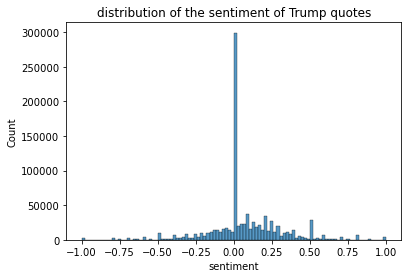

In [76]:
sns.histplot(data = df_Trump['sentiment'], bins=100) 
plt.rcParams["figure.figsize"] = (6,4)
plt.title('distribution of the sentiment of Trump quotes')
plt.show()

This is basically what we were interested in if we could have just collected quotes referring to Trump himself, it could have been interested to study the evolution of this "polarization" distribution over different periods to see which choices of Trump were appreciated the most by the speaker.

### From now on, we will focus on the project described in the readme file

In [5]:
df_Trump = pd.read_csv('df_Trump_cleaned.csv', header =0, index_col=0, parse_dates=True, squeeze = True )
df_Trump.index = df_Trump.index.map(lambda x: str(x)[:-7]) #we transform the quote_ID in a format date
df_Trump.to_csv('df_Trumps_with_dates.csv')

In [6]:
df_Trump = pd.read_csv('df_Trumps_with_dates.csv',header =0, index_col=0, parse_dates=True, squeeze = True )

In [15]:
df_Trump.head(10) #as we can see now we have the dates

,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
quoteID,,,,,,,,
2015-06-18,How long do you think it'll take for Donald Tr...,Chris Matthews,"['Q15735939', 'Q25189328', 'Q5107375', 'Q51108...",2015-06-18 10:00:00,1,"[['Chris Matthews', '0.3869'], ['None', '0.319...",['http://talkingpointsmemo.com/dc/donald-trump...,E
2015-09-16,And I'm just pointing out the absurd on both s...,Kathleen Madigan,['Q6376814'],2015-09-16 05:44:37,1,"[['Kathleen Madigan', '0.8025'], ['None', '0.1...",['http://northjersey.com/arts-and-entertainmen...,E
2015-05-11,"And you had Michael Jackson roller skating, an...",Jim McMahon,"['Q1689159', 'Q17306267', 'Q6196886']",2015-05-11 02:03:27,1,"[['Jim McMahon', '0.8731'], ['None', '0.1232']...",['http://www.seattletimes.com/seattle-news/bel...,E
2015-10-20,I like that he's not spinning things. He seems...,None,[],2015-10-20 23:46:58,1,"[['None', '0.7832'], ['Ben Carson', '0.0755'],...",['http://detroitnews.com/story/news/politics/2...,E
2015-12-22,"I promise, I won't talk about Trump again,",Jeb Bush,['Q221997'],2015-12-22 20:43:59,10,"[['Jeb Bush', '0.7816'], ['None', '0.1677'], [...",['http://www.politico.com/story/2015/12/jeb-bu...,E
2015-05-20,"If I recall correctly, tickets for newly-elect...",None,[],2015-05-20 03:11:06,1,"[['None', '0.9528'], ['Donald Trump', '0.0472']]",['http://chicago.suntimes.com/news/7/71/609234...,E
2015-07-21,I'm sure the Republicans are enjoying Mr. Trum...,President Barack Obama,['Q76'],2015-07-21 15:18:20,205,"[['President Barack Obama', '0.6523'], ['None'...",['http://azdailysun.com/entertainment/televisi...,E
2015-07-22,"it in particular thrives on theater, which Tru...",Frank Bruni,['Q1443006'],2015-07-22 13:33:11,1,"[['Frank Bruni', '0.8479'], ['None', '0.1246']...",['http://www.adweek.com/tvnewser/bob-kerrey-on...,E
2015-07-14,it was appalling to hear Donald Trump describe...,Hillary Clinton,['Q6294'],2015-07-14 08:40:17,1,"[['Hillary Clinton', '0.8129'], ['None', '0.11...",['http://www.bloomberg.com/politics/articles/2...,E


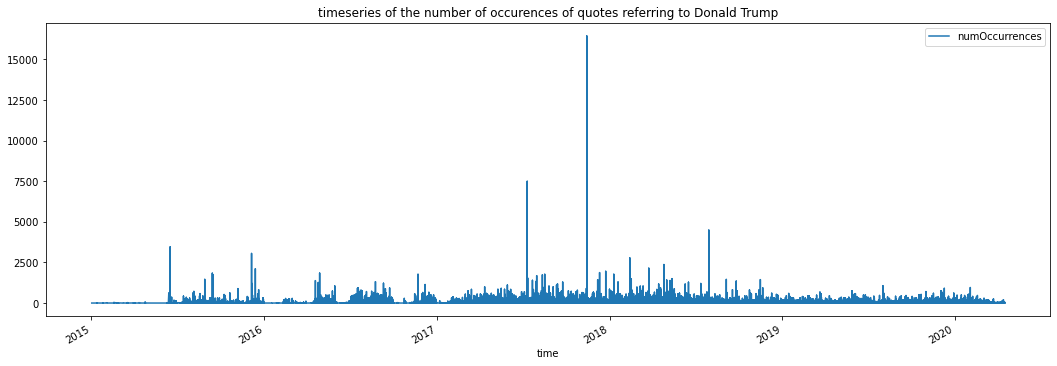

In [108]:
# we plot the Trump timeseries of the number of quotes over the past few years
plt.rcParams["figure.figsize"] = (18,6)
ax = df_Trump.plot()
plt.title('timeseries of the number of occurences of quotes referring to Donald Trump')
plt.xlabel('time')
plt.show()

In [18]:
df_Trump.head(10)

,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
quoteID,,,,,,,,
2015-06-18,How long do you think it'll take for Donald Tr...,Chris Matthews,"['Q15735939', 'Q25189328', 'Q5107375', 'Q51108...",2015-06-18 10:00:00,1,"[['Chris Matthews', '0.3869'], ['None', '0.319...",['http://talkingpointsmemo.com/dc/donald-trump...,E
2015-09-16,And I'm just pointing out the absurd on both s...,Kathleen Madigan,['Q6376814'],2015-09-16 05:44:37,1,"[['Kathleen Madigan', '0.8025'], ['None', '0.1...",['http://northjersey.com/arts-and-entertainmen...,E
2015-05-11,"And you had Michael Jackson roller skating, an...",Jim McMahon,"['Q1689159', 'Q17306267', 'Q6196886']",2015-05-11 02:03:27,1,"[['Jim McMahon', '0.8731'], ['None', '0.1232']...",['http://www.seattletimes.com/seattle-news/bel...,E
2015-10-20,I like that he's not spinning things. He seems...,None,[],2015-10-20 23:46:58,1,"[['None', '0.7832'], ['Ben Carson', '0.0755'],...",['http://detroitnews.com/story/news/politics/2...,E
2015-12-22,"I promise, I won't talk about Trump again,",Jeb Bush,['Q221997'],2015-12-22 20:43:59,10,"[['Jeb Bush', '0.7816'], ['None', '0.1677'], [...",['http://www.politico.com/story/2015/12/jeb-bu...,E
2015-05-20,"If I recall correctly, tickets for newly-elect...",None,[],2015-05-20 03:11:06,1,"[['None', '0.9528'], ['Donald Trump', '0.0472']]",['http://chicago.suntimes.com/news/7/71/609234...,E
2015-07-21,I'm sure the Republicans are enjoying Mr. Trum...,President Barack Obama,['Q76'],2015-07-21 15:18:20,205,"[['President Barack Obama', '0.6523'], ['None'...",['http://azdailysun.com/entertainment/televisi...,E
2015-07-22,"it in particular thrives on theater, which Tru...",Frank Bruni,['Q1443006'],2015-07-22 13:33:11,1,"[['Frank Bruni', '0.8479'], ['None', '0.1246']...",['http://www.adweek.com/tvnewser/bob-kerrey-on...,E
2015-07-14,it was appalling to hear Donald Trump describe...,Hillary Clinton,['Q6294'],2015-07-14 08:40:17,1,"[['Hillary Clinton', '0.8129'], ['None', '0.11...",['http://www.bloomberg.com/politics/articles/2...,E


The time serie is quite interesting, as we can see there are some peaks in it, one big peak at the end of 2017. In milestone 3 we will try to link these peaks with the political events in his career

### We could try to filter the dataset finding just the quotes in the two months before and after the elections of november 2016 in order to understand if this event correspond to a major number of quotes referring to Trump

In [115]:
df_Trump_2_months_before = df_Trump[('2016-11-09'>=df_Trump.index) & (df_Trump.index >= '2016-09-01')] 

In [116]:
df_Trump_2_months_before

,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
quoteID,,,,,,,,
2016-09-07,Among the type of donations that are banned ar...,None,[],2016-09-07 10:55:05,2,"[['None', '0.8305'], ['Donald Trump', '0.1312'...",['https://www.rt.com/business/358505-goldman-s...,E
2016-09-07,And now we're the United Kingdom of Trump.,None,[],2016-09-07 17:33:54,5,"[['None', '0.7236'], ['Donald Trump', '0.2764']]",['http://thepeninsulaqatar.com/news/internatio...,E
2016-09-28,"Better deal how? What exactly is your idea, Do...",Elizabeth Warren,['Q434706'],2016-09-28 08:34:00,2,"[['Elizabeth Warren', '0.5615'], ['None', '0.3...",['http://www.politico.com/story/2016/09/warren...,E
2016-09-28,"Donald Trump Sniff Song,",Jonathan Mann,"['Q1703248', 'Q6273813']",2016-09-28 15:34:01,1,"[['Jonathan Mann', '0.6536'], ['None', '0.2205...",['http://elitedaily.com/humor/hillary-shimmy-s...,E
2016-09-15,Donald Trump will play the `tomorrow I'll show...,Kurt Eichenwald,['Q6446710'],2016-09-15 07:57:00,1,"[['Kurt Eichenwald', '0.7897'], ['None', '0.09...",['http://www.politicususa.com/2016/09/15/rache...,E
...,...,...,...,...,...,...,...,...
2016-09-02,"They are appalled by Trump,",None,[],2016-09-02 06:38:00,6,"[['None', '0.9391'], ['Donald Trump', '0.0609']]",['http://www.washingtonpost.com/blogs/wonkblog...,E
2016-09-11,They came behind [ Trump ] when he chose that ...,None,[],2016-09-11 20:21:07,3,"[['None', '0.8032'], ['Mike Pence', '0.1376'],...",['http://www.washingtontimes.com/news/2016/sep...,E
2016-09-01,Trump supporter takes issue with woman holding...,David Wallace,"['Q16239427', 'Q313246', 'Q41969013', 'Q434427...",2016-09-01 10:56:41,1,"[['David Wallace', '0.9465'], ['None', '0.049'...",['http://www.prisonplanet.com/photos-protester...,E


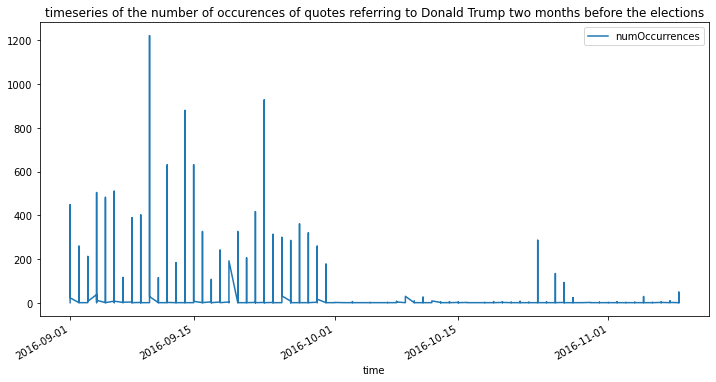

In [119]:
# we plot the Trump timeseries of the number of quotes over the past two months before the elections
plt.rcParams["figure.figsize"] = (12,6)
ax = df_Trump_2_months_before.plot()
plt.title('timeseries of the number of occurences of quotes referring to Donald Trump two months before the elections')
plt.xlabel('time')
plt.show()

In [125]:
df_Trump_2_months_after = df_Trump[('2016-11-09'<=df_Trump.index) & (df_Trump.index <= '2017-01-01')] 

In [126]:
df_Trump_2_months_after

,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
quoteID,,,,,,,,
2016-12-02,"Even before taking office, President-elect Tru...",Peter Navarro,['Q7176052'],2016-12-02 17:08:05,1,"[['Peter Navarro', '0.8587'], ['None', '0.119'...",['http://www.newsmax.com/Politics/donald-trump...,E
2016-12-04,Fears of heightened bigotry and hate crimes ha...,None,[],2016-12-04 21:17:56,5,"[['None', '0.8085'], ['Donald Trump', '0.1915']]",['http://forum.prisonplanet.com/index.php?topi...,E
2016-12-28,forces the Trump administration to decide what...,Ian Lustick,['Q5982105'],2016-12-28 17:07:17,2,"[['Ian Lustick', '0.6335'], ['None', '0.169'],...",['http://komonews.com/news/nation-world/obama-...,E
2016-12-07,I was all for Trump. Do I feel my ideas appear...,Pat Buchanan,"['Q149127', 'Q48700522']",2016-12-07 06:00:00,1,"[['Pat Buchanan', '0.8578'], ['None', '0.126']...",['http://thedailybeast.com/articles/2016/12/07...,E
2016-12-07,I'm not going to block things just because it ...,None,[],2016-12-07 18:59:48,7,"[['None', '0.5499'], ['Patrick Murphy', '0.345...",['http://fox11online.com/news/connect-to-congr...,E
...,...,...,...,...,...,...,...,...
2017-01-01,As part of his minimal interest in foreign aff...,None,[],2017-01-01 06:07:02,1,"[['None', '0.7967'], ['Donald Trump', '0.2033']]",['https://www.middleeastmonitor.com/20170101-e...,E
2017-01-01,We had all kinds of outside actors who were ea...,Kyle Saunders,['Q42431821'],2017-01-01 19:20:00,1,"[['Kyle Saunders', '0.6367'], ['James Comey', ...",['http://blogs.alternet.org/news-amp-politics/...,E
2017-01-01,There would be nothing gained if Trump opponen...,Stephan Lewandowsky,['Q16192820'],2017-01-01 19:20:00,3,"[['Stephan Lewandowsky', '0.4878'], ['None', '...",['http://blogs.alternet.org/news-amp-politics/...,E


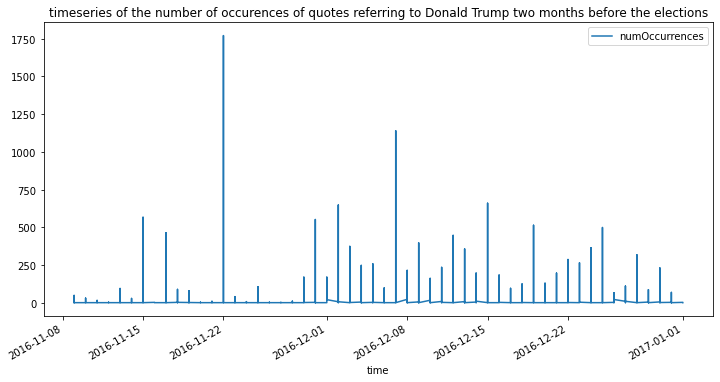

In [127]:
# we plot the Trump timeseries of the number of quotes over the past two months before the elections
plt.rcParams["figure.figsize"] = (12,6)
ax = df_Trump_2_months_after.plot()
plt.title('timeseries of the number of occurences of quotes referring to Donald Trump two months before the elections')
plt.xlabel('time')
plt.show()

### It could be interseting to know who are the people who quote Trump the most, we will try to understand it

In [84]:
def major_speakers(df, politician):
    print('the people who are speaking the most about '+politician+'are\n', df['speaker'].value_counts()[:10].index.tolist())
    df['speaker'].value_counts()[:10].plot(kind='bar', logy=True)
    plt.title('people who are speaking the most about '+politician)
    plt.ylabel('number of quotes')
    plt.show()

the people who are speaking the most about Trumpare
 ['None', 'Bernie Sanders', 'Hillary Clinton', 'Mike Pence', 'Lindsey Graham', 'Stephen Colbert', 'Nancy Pelosi', 'Joe Biden', 'Elizabeth Warren', 'Chuck Schumer']


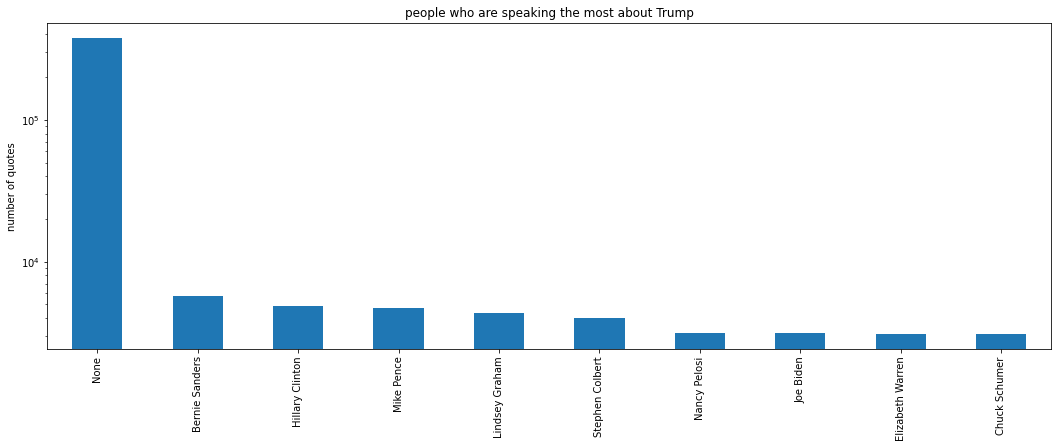

In [86]:
major_speakers(df_Trump, 'Trump')

As we can see Hillary Clinton and Joe Biden are present in the list. This is quite obvious since they have been the two contenders at the last political elections and it is clear that they had to quote Trump a lot in order to discredit his opinion.

In [87]:
del df_Trump # we don't want to store it in memory

In [72]:
for year in years_list:
    one_df_Clinton = filter_dataframe("Clinton", year)
    one_df_Clinton.to_pickle('df_Clinton'+year+'.pkl')
    print('i finished one file')

KeyboardInterrupt: 

In [73]:
list_df_Clinton = []
for year in years_list:
    one_df_Clinton = pd.read_pickle('df_Clinton'+year+'.pkl')
    list_df_Clinton.append(one_df_Clinton)
df_Clinton = pd.concat(list_df_Clinton)

In [74]:
df_Clinton.to_csv('df_Clinton.csv', index=False)

In [88]:
df_Clinton = pd.read_csv('df_Clinton.csv')

In [89]:
n_rows_before_cleaning = df_Clinton.shape[0]

In [90]:
count = 0
for el in parquet_frame['aliases']:
    count=count+1
    if type(el) == np.ndarray:
        if ('Clinton' in el):
            Clinton_aliases = el
            print(Clinton_aliases)

['William Jefferson Clinton' 'William Jefferson Blythe III'
 'William Jefferson Blythe' 'William J. Clinton' 'Clinton'
 'William Jefferson "Bill" Clinton' 'William Clinton' 'President Clinton'
 'President Bill Clinton' 'Kelindun' 'William Jefferson, IV Blythe'
 'Bill Klinton' 'WJC']
['Clinton' 'George William Clinton']


It is strange that we don't have aliases referred to Hillary Clinton but just aliases referred to Bill Clinton or other people whose surname is Clinton

In [91]:
df_Clinton = removing_not_inherent_quotes(['William Jefferson Clinton', 'William J. Clinton', 'Bill Clinton',
                                        'William Clinton', 'President Clinton', 'President Bill Clinton', 'George William Clinton'], df_Clinton, ['Clinton', 'Hillary Clinton'])

In [92]:
n_rows_after_cleaning = df_Clinton.shape[0]

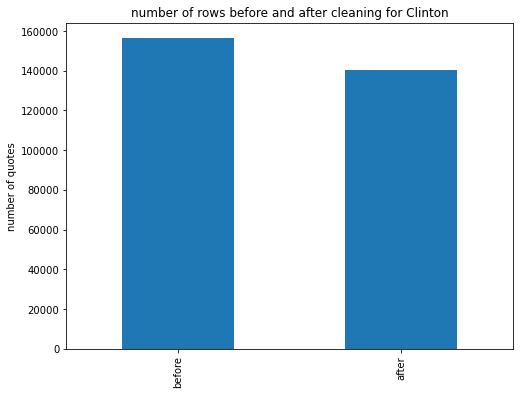

In [94]:
cleaning_results(n_rows_before_cleaning, n_rows_after_cleaning, 'Clinton')

In [95]:
df_Clinton.to_csv('df_Clinton_cleaned.csv', index=False)

In [96]:
df_Clinton #we have a look at the dataframe

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2015-10-25-000242,"' It is not now, nor has it ever been, the gol...",Bernie Sanders,['Q359442'],2015-10-25 14:12:35,1,"[['Bernie Sanders', '0.5395'], ['None', '0.312...",['http://examiner.com/article/bernie-sanders-s...,E
1,2015-07-30-032957,"I am supporting Hillary Clinton for president,",None,[],2015-07-30 04:08:03,1,"[['None', '0.5004'], ['Miro Weinberger', '0.46...",['http://www.sevendaysvt.com/OffMessage/archiv...,E
3,2015-09-16-006359,And I'm just pointing out the absurd on both s...,Kathleen Madigan,['Q6376814'],2015-09-16 05:44:37,1,"[['Kathleen Madigan', '0.8025'], ['None', '0.1...",['http://northjersey.com/arts-and-entertainmen...,E
5,2015-08-15-008350,Clinton's College Hypocrisy Tour Rolls On,None,[],2015-08-15 23:24:29,1,"[['None', '0.8041'], ['Marco Rubio', '0.1016']...",['http://miamiherald.typepad.com/nakedpolitics...,E
6,2015-08-25-044501,If Vice President Joe Biden decides to jump in...,None,[],2015-08-25 12:05:31,2,"[['None', '0.6475'], ['Joe Biden', '0.29'], ['...",['http://feeds.huffingtonpost.com/c/35496/f/67...,E
...,...,...,...,...,...,...,...,...,...
156387,2020-02-08-016054,"I had done a lot of presidential debates, but ...",Chris Wallace,"['Q21256789', 'Q2964884', 'Q2964885', 'Q376249...",2020-02-08 04:40:01,1,"[['Chris Wallace', '0.9267'], ['None', '0.0702...",['https://www.thewrap.com/fox-news-chris-walla...,E
156388,2020-01-06-061256,The main difference between Lindsey and his De...,David Woodard,['Q1177254'],2020-01-06 12:00:30,6,"[['David Woodard', '0.7544'], ['None', '0.1797...",['http://chron.com/entertainment/article/How-L...,E
156389,2020-04-09-052373,The model of Obama asking Bush and Clinton to ...,Bill Haslam,['Q862186'],2020-04-09 23:04:21,1,"[['Bill Haslam', '0.905'], ['None', '0.0837'],...",['http://www.nytimes.com/2020/04/09/us/politic...,E
156390,2020-01-22-037250,I think the fact is that Mitch keeps telling y...,Patrick Leahy,['Q59315'],2020-01-22 02:53:15,10,"[['Patrick Leahy', '0.8213'], ['None', '0.148'...",['http://wicz.com/story/41593610/inside-the-re...,E


In [101]:
df_Clinton = pd.read_csv('df_Clinton_cleaned.csv',header =0, index_col=0, parse_dates=True, squeeze =True )

In [102]:
df_Clinton.index = df_Clinton.index.map(lambda x: str(x)[:-7]) # we transform the quote_id in a format date
df_Clinton.to_csv('df_Clinton_with_dates.csv') #checkpoint

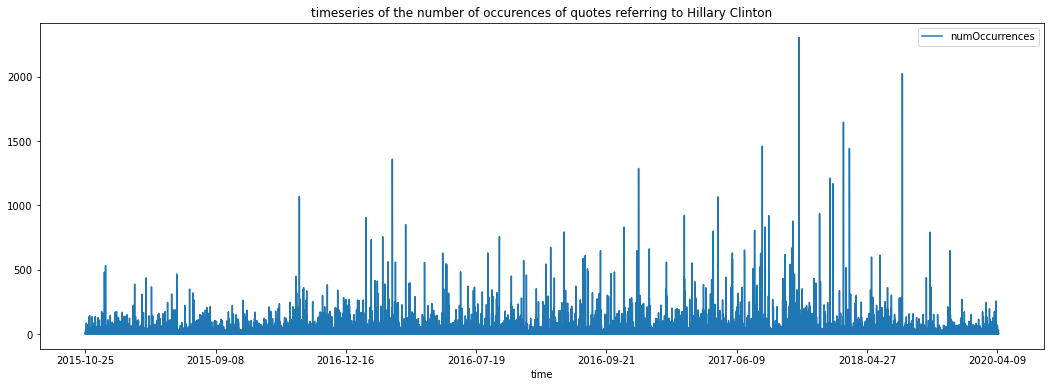

In [103]:
import matplotlib.ticker as plticker

plt.rcParams["figure.figsize"] = (18,6)
ax = df_Clinton.plot()
plt.title('timeseries of the number of occurences of quotes referring to Hillary Clinton')
plt.xlabel('time')
plt.show()

As we can see one of the peaks is the one corresponding to the elections of november 2016

### It could be interseting to know who are the people who quote Clinton the most, we will try to understand it

the people who are speaking the most about Clintonare
 ['None', 'Donald Trump', 'Bernie Sanders', 'President Donald Trump', 'James Comey', 'Carly Fiorina', 'Tom Fitton', 'Ted Cruz', 'President Trump', 'Reince Priebus']


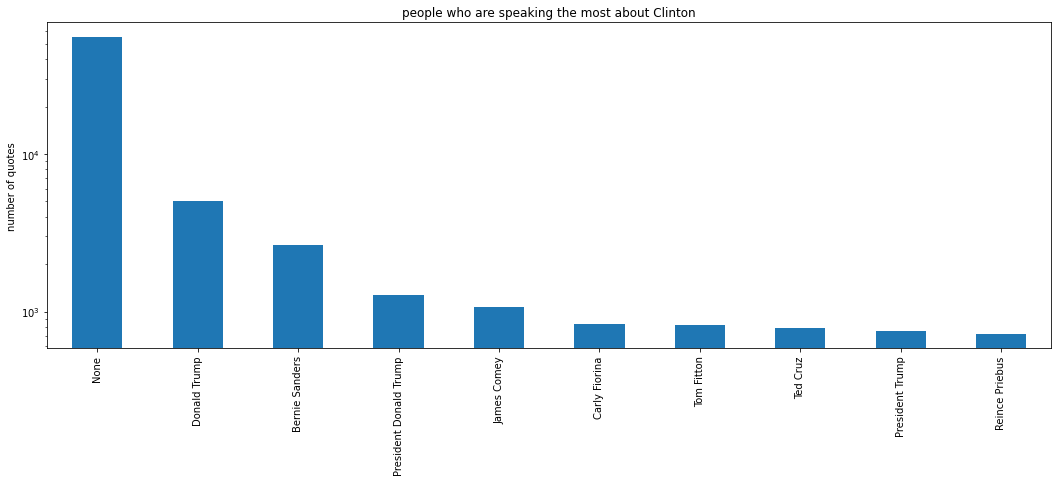

In [104]:
major_speakers(df_Clinton, 'Clinton')

As we can see Trump is quoting a lot Clinton, this could be related to the fact that a big part of his political campaign of 2016 was based on discrediting his contender (Clinton)